# Day 1

### List of terms I learnt

- Some basic concepts in Statistics:
    - Mean
    - Median
    - Mode
- Box Plot
- Population & Sample
- Variance & Non-bias Variance of the Sample
- Random Variable
- PMF & PDF
- Binomial Distribution

## Basic concepts
*These basic measures can somehow, in a certain way, describe the centrial tendency of a sequence of numbers.*

#### Mean:  (The arithmetic average of all numbers)

- $\mu = \frac{1}{m}\displaystyle \sum_{i=1\to m}{x_i}$

#### Median: (The num sits in the middle of the sorted sequence of numbers)
- if lenght of seq is odd:
    - median = the num in the middle
- if even:
    - median = mean of two nums in the middle

#### Mode: (The num presents in largest frequency)

In [1]:
import pandas as pd

seq = pd.Series([23, 29, 20, 32, 23, 21, 33, 25, 25])

print('Mean:',   seq.mean())     #  a number
print('Median:', seq.median())   #  a number
print('Mode:\n',   seq.mode())   #  a Series Object: Cuz mode may happened to be multiple nums in the sequence

Mean: 25.666666666666668
Median: 25.0
Mode:
 0    23
1    25
dtype: int64


#### Range:(how large the data spread out)
- range = max - min


#### Midrange:(mean of max and min)
- midRange = mean(max, min)

## Box Plot

![image.png](./imgs/BoxPlot.png)

## Population and Sample

**Population:**
    - All the possible outcome of an experiment
**Sample:**
    - Subset of population
    
Some notation convention:
- Mean of Population:  
    - $\mu$
- Mean of Sample:
    - $\overline{X}$

### Variance
*A measure to evaluate the "dispertion" or "how further away the samples spread out with respect to the mean value"*  
$\displaystyle \qquad \sigma^2=\frac{1}{N}\sum_{i= 1 \to N}(x_i-\mu)^2=\frac{1}{N}\sum_{i= 1 \to N}{x_i^2}-\mu^2$

#### Sample Variance   
$\qquad S^2$
#### non-bias Sample Variance   
$\qquad S^2_{n-1}=\frac{1}{n-1}\cdot\displaystyle \sum_{i= 1 \to n-1}(x_i-\overline{X})^2$ 

### Standard Variance   
$\displaystyle \qquad \sigma = \sqrt{\sigma^2}$

## Random Variable

*Random Variable is not a variable, actually is a "function" mapping the outcomes of the experiment to another value.*

**Two kinds of R.V.:**
- ***Discete***
    - can only take finite number of values
- ***Continuouse***
    - contains infinite many possible outcomes


### Probability Mass Function:
- For discrete case, PMF can be constructed by each possible outcome with it probability
    - $P(X = k)=F(k)$
    
### Probability Dense Function:
- For continuouse case, PDF shows the "likelyhood (not probability!) over which specific value the outcome can take"
    - $P(X = k)=0$
    - $P(X \leq k)= F(k)= \displaystyle \int_{-\infty}^{k}f(x)dx$
        - f(x): PDF
        - F(x): CDF

## Binomial Distribution

If the experiment can only have 2 possible outcome, then it can be called "Bernoulli Experiment".  
The PMF of Bernoulli Distribution:  

$\qquad F(x)=
\begin{cases}
p& \text{if x=1}\\
1-p& \text{if x=0}
\end{cases}$

If continuously and independently do the Bernoulli Experiment for n times, then the new experiment fits "Binomial Distribution".
The PMF of Binomial Distribution:  

$\qquad P(X=k)=\begin {cases}{n \choose k} p^k (1-p)^{n-k}=\frac{n!}{k!(n-k)!} \cdot p^k (1-p)^{n-k} {\quad if x \in \{n\}} \\ 
0 \quad { otherwise} \end {cases}$



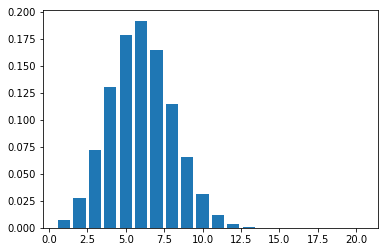

In [3]:
# Binomial Distribtion
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

def F(k):
    global p, n
    return comb(n,k) * p**k * (1-p)**(n-k)

p = 0.3  # Probability of geting positive outcome
n = 20   # NO. of experiments

k = np.arange(1, n+1)

plt.bar(k, F(k))
plt.show()

# Day 2

What I've learnt
- Expected Value: E(X) 
- $X \sim B(n, p) \qquad E(x)=np$
- Poisson Distribution and derivation
- Law of Large Number
- Basis of Gaussian Distribution
- Z-score and 68-95-99.7

## Expected Value (Expectation)

***Expected Value*** : *are essentially the same as arithmetic "MEAN", which can be depicted as graviational center of PMF, or probability weighted average.*  

- $E(X)=\displaystyle \sum_{i=1 \to n}{p_i \cdot x_i}$

#### Expected Value of Binomial Distribution
$E(X) = np$


**Derivation:**  

$\begin{align} \displaystyle  E(x) &=\sum_{k=0 \to n}{k \cdot p_k}  \\
& = \sum_{k=1}^n k \cdot {n \choose k} p^k (1-p)^{n-k} \\
& =\sum_{k=1}^n \frac {n(n-1)!}{(k-1)!(n-k)!} p^k (1-p)^{n-k}  \\
& = np\sum_{k=1}^n \frac {(n-1)!}{(k-1)!(n-k)!}p^k  (1-p)^{n-k} \qquad  \\
& = np \underbrace {\sum_{a=0}^b \frac {b!}{a!(b-a)!}p^a  (1-p)^{b-a}}_{ = \, 1}  \\
& = np \end{align}$  

where:  
$\qquad { a = k -1,\\
 b = n - 1}$

## Poisson Distribution

*Question:  X is # of cars passed in an hour, find E(X)*  

*Assumption:*
- each car passed independently
- the car flow is steady within every interval of time


Let  
    $\qquad E(x)=\lambda=np=x \cdot\frac{\lambda}{x}$  
where:  
    $\qquad \lambda: \text {average #cars passed in an hour}$  
    $\qquad x: \text {#time-intervals within a hour}$  
    $\qquad \frac{\lambda}{x}: \text {probability of a car passed in an interval}$  

Then the distribution of X obey "Binomial Distribution":  
$\begin{align} \displaystyle  P(X = k) & = \lim_{x \to \infty} {x \choose k} (\frac{\lambda}{x})^k (1-\frac{\lambda}{x})^{(x-k)}  \\ 
& =\lim_{x \to \infty} \frac {x!}{k!(x-k)!}\frac{\lambda^k}{x^k}(1-\frac{\lambda}{x})^x(1-\frac{\lambda}{x})^{-k}  \\ 
& =\lim_{x \to \infty} \frac {x(x-1)...(x-k+1)}{x^k}\frac{\lambda^k}{k!}(1-\frac{\lambda}{x})^x(1-\frac{\lambda}{x})^{-k}  \\ 
& =\frac {\lambda^k}{k!}e^{-\lambda}
\end{align}$

## The Law of Large Numbers

X: #Heads after flip a fair coin 100 times.
So the TRUE expected value is: $E(X)=100*0.5 = 50$

If try the experiment n times($n \to \infty$), then the average of the Sample will converge to the TRUE E(X).  

$\qquad \displaystyle \lim_{n \to \infty} \overline{X_n}=\frac{x_1+x_2+ ...}{n}=E(X)$

## Gaussian Distribution

$\qquad f(x)=\frac{1}{\sqrt {2 \pi \sigma^2} }e^{-\frac{1}{2}{(\frac{x-\mu}{\sigma})}^2 }$  

where:  

$\quad \mu: \text{mean}\\ 
\quad \sigma: \text {standard deviation}$

#### Z-Score:
*measures how many $\sigma$ away from from the $\mu$*  

$\qquad Z = \frac{x-\mu}{\sigma}$

![image.png](./imgs/normalDistribution.png)

### Empirical Rule (aka. 68-95-99.7)
- $P(-\sigma \leq X \leq \sigma)=68\%$  
- $P(-2\sigma \leq X \leq 2\sigma)=95\%$  
- $P(-3\sigma \leq X \leq 3\sigma)=99.7\%$

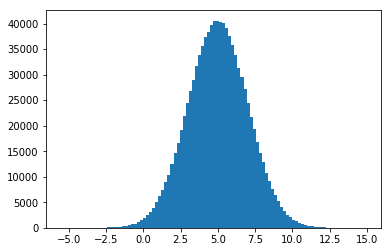

The probability of getting a number in area between 1 std: 68.2621 %
The probability of getting a number in area between 2 std: 95.4763 %
The probability of getting a number in area between 3 std: 99.7232 %


In [2]:
import numpy as np
import matplotlib.pyplot as plt

mu = 5
sigma = 2

S = np.random.normal(mu, sigma, 1000000)
plt.hist(S, bins=100)
plt.show()

# Validation of 68-95-99.7 rule
print('The probability of getting a number in area between 1 std:', 100 * np.sum((S<(mu+sigma))&(S>(mu-sigma))) / len(S), '%')
print('The probability of getting a number in area between 2 std:', 100 * np.sum((S<(mu+2*sigma))&(S>(mu-2*sigma))) / len(S), '%')
print('The probability of getting a number in area between 3 std:', 100 * np.sum((S<(mu+3*sigma))&(S>(mu-3*sigma))) / len(S), '%')
